In [1492]:
from pylab import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.lda import LDA
import datetime
import re
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

#data1 = "/Users/Derrick/Desktop/data science new topic/SAT_Results.csv" # data path to data
#data2 = "/Users/Derrick/Desktop/data science new topic/nysd.csv"
#data3 = "/Users/Derrick/Desktop/data science new topic/NYS_Math_Test_Results_By_Grade_2006-2011_-_School_Level_-_All_Students.csv"
#data4 = "/Users/Derrick/Desktop/data science new topic/School_Attendance_and_Enrollment_Statistics_by_District__2010-11.csv"
#data5 = "/Users/Derrick/Desktop/data science new topic/School_Demographics_and_Accountability_Snapshot_2006-2012.csv"
#data6 = "/Users/Derrick/Desktop/data science new topic/Graduation_Outcomes_-_Classes_Of_2005-2010_-_School_Level.csv"
#data7 = "/Users/Derrick/Desktop/data science new topic/AP__College_Board__2010_School_Level_Results.csv"
#data8 = "/Users/Derrick/Desktop/data science new topic/2010-2011_Class_Size_-_School-level_detail.csv"
#data9 = "/Users/Derrick/Desktop/data science new topic/masterfile11_d75_final.xlsx"
#data10 = "/Users/Derrick/Desktop/data science new topic/masterfile11_gened_final.xlsx"
#data11 = "/Users/Derrick/Desktop/data science new topic/Survey Data Dictionary.xls"

data1 = "/Users/dev_derrick/Desktop/data science new topic/SAT_Results.csv" # data path to data
#data1 = "/Users/dev_derrick/Desktop/data science new topic/SAT__College_Board__2010_School_Level_Results.csv"
data2 = "/Users/dev_derrick/Desktop/data science new topic/nysd.csv"
data3 = "/Users/dev_derrick/Desktop/data science new topic/NYS_Math_Test_Results_By_Grade_2006-2011_-_School_Level_-_All_Students.csv"
data4 = "/Users/dev_derrick/Desktop/data science new topic/School_Attendance_and_Enrollment_Statistics_by_District__2010-11_.csv"
data5 = "/Users/dev_derrick/Desktop/data science new topic/School_Demographics_and_Accountability_Snapshot_2006-2012.csv"
data6 = "/Users/dev_derrick/Desktop/data science new topic/Graduation_Outcomes_-_Classes_Of_2005-2010_-_School_Level.csv"
data7 = "/Users/dev_derrick/Desktop/data science new topic/AP__College_Board__2010_School_Level_Results.csv"
data8 = "/Users/dev_derrick/Desktop/data science new topic/2010-2011_Class_Size_-_School-level_detail.csv"
#data8 = "/Users/dev_derrick/Desktop/data science new topic/2009-10_Class_Size_-_School-level_Detail.csv"
data9 = "/Users/dev_derrick/Desktop/data science new topic/masterfile11_d75_final.txt"
data10 = "/Users/dev_derrick/Desktop/data science new topic/masterfile11_gened_final.txt"
data11 = "/Users/dev_derrick/Desktop/data science new topic/Survey Data Dictionary.xls"
data12 = "/Users/dev_derrick/Desktop/data science new topic/DOE_High_School_Directory_2014-2015.csv"
data13 = "/Users/dev_derrick/Desktop/data science new topic/School_Progress_Report_2010-2011.csv"
#data13 = "/Users/dev_derrick/Desktop/data science new topic/School_Progress_Reports_-_All_Schools_-_2009-10.csv"
data14 = "/Users/dev_derrick/Desktop/data science new topic/School_District_Breakdowns.csv"
data15 = "/Users/dev_derrick/Desktop/data science new topic/attendance.csv"

In [1493]:
readFile1 = pd.read_csv(data1)
readFile1.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


In [1494]:
readFile1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
DBN                                478 non-null object
SCHOOL NAME                        478 non-null object
Num of SAT Test Takers             478 non-null object
SAT Critical Reading Avg. Score    478 non-null object
SAT Math Avg. Score                478 non-null object
SAT Writing Avg. Score             478 non-null object
dtypes: object(6)
memory usage: 22.5+ KB


In [1495]:
cols_ = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols_:
    readFile1[c] = readFile1[c].convert_objects(convert_numeric=True)

readFile1['sat_score'] = readFile1[cols_[0]] + readFile1[cols_[1]] + readFile1[cols_[2]]

/Users/dev_derrick/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


In [1496]:
readFile2 = pd.read_csv(data2)
readFile2.head()

,the_geom,SchoolDist,Shape_Leng,Shape_Area
0,MULTIPOLYGON (((-73.82049919995312 40.80101146...,25,175816.081000,4.436314e+08
1,MULTIPOLYGON (((-74.02552971543656 40.65147855...,20,95513.486010,2.427230e+08
2,MULTIPOLYGON (((-73.95671863064405 40.78660079...,3,52071.976405,1.134879e+08
3,MULTIPOLYGON (((-73.92133752419399 40.80085210...,4,52056.107857,5.262001e+07
4,MULTIPOLYGON (((-73.74344992332192 40.77824115...,26,125716.377003,4.249042e+08


In [1497]:
readFile3 = pd.read_csv(data3)
readFile3.head()

,DBN,Grade,Year,Category,Number Tested,Mean Scale Score,Level 1 #,Level 1 %,Level 2 #,Level 2 %,Level 3 #,Level 3 %,Level 4 #,Level 4 %,Level 3+4 #,Level 3+4 %
0,01M015,3,2006,All Students,39,667,2,5.1%,11,28.2%,20,51.3%,6,15.4%,26,66.7%
1,01M015,3,2007,All Students,31,672,2,6.5%,3,9.7%,22,71%,4,12.9%,26,83.9%
2,01M015,3,2008,All Students,37,668,0,0%,6,16.2%,29,78.4%,2,5.4%,31,83.8%
3,01M015,3,2009,All Students,33,668,0,0%,4,12.1%,28,84.8%,1,3%,29,87.9%
4,01M015,3,2010,All Students,26,677,6,23.1%,12,46.2%,6,23.1%,2,7.7%,8,30.8%


In [1498]:
readFile4 = pd.read_csv(data4)
readFile4.head()

,District,YTD % Attendance (Avg),YTD Enrollment(Avg)
0,DISTRICT 01,91.18%,12367
1,DISTRICT 02,89.01%,60823
2,DISTRICT 03,89.28%,21962
3,DISTRICT 04,91.13%,14252
4,DISTRICT 05,89.08%,13170


In [1499]:
readFile5 = pd.read_csv(data5)
readFile5.head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4


In [1500]:
readFile6 = pd.read_csv(data6)
readFile6.head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,...,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4%,37,47.4%,84.1%,...,37,47.4%,84.1%,7,9%,15.9%,15,19.2%,11,14.1%


In [1501]:
readFile7 = pd.read_csv(data7)
readFile7.head()

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39,49,10
1,01M450,EAST SIDE COMMUNITY HS,19,21,s
2,01M515,LOWER EASTSIDE PREP,24,26,24
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255,377,191
4,02M296,High School of Hospitality Management,s,s,s


In [1502]:
readFile8 = pd.read_csv(data8)
readFile8.head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


In [1503]:
readFile12 = pd.read_csv(data12)
readFile12.head()

,dbn,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67..."
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9,12,NaN,NaN,...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026..."
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6,12,NaN,NaN,...,Then to Bronx students or residents who attend...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241..."
3,02M280,Manhattan Early College School for Advertising,Manhattan,M520,718-935-3477,NaN,9,10,9,14.0,...,Then to New York City residents who attend an ...,Then to Manhattan students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"411 Pearl Street\nNew York, NY 10038\n(40.7106..."
4,28Q680,Queens Gateway to Health Sciences Secondary Sc...,Queens,Q695,718-969-3155,718-969-3552,6,12,NaN,NaN,...,Then to Districts 28 and 29 students or residents,Then to Queens students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"160-20 Goethals Avenue\nJamaica, NY 11432\n(40..."


In [1504]:
readFile5["DBN"].head()

0    01M015
1    01M015
2    01M015
3    01M015
4    01M015
Name: DBN, dtype: object

#### add DBN column into readfile8, including CSD, Borough and School Code

In [1505]:
#readFile8["DBN"] = readFile8.apply(lambda x: "{0:02d}{1}".format(x["CSD"], x["SCHOOL CODE"]), axis=1)
#readFile8.head()

In [1506]:
#new_readFile8 = readFile8.drop(readFile8.columns[[0, 1, 2]], axis=1)

In [1507]:
#new_readFile8.head()

In [1508]:
#cols = new_readFile8.columns.tolist()
#cols

In [1509]:
#cols_switch = cols[-1:] + cols[:-1]
#cols_switch

In [1510]:
#new_readFile8 =  new_readFile8[cols_switch]
#new_readFile8.head()

#### change column[dbn] name in readFile12 to DBN 

In [1511]:
readFile12["DBN"] = readFile12["dbn"]
readFile12.head()

,dbn,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,DBN
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",17K548
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9,12,NaN,NaN,...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",09X543
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6,12,NaN,NaN,...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...",09X327
3,02M280,Manhattan Early College School for Advertising,Manhattan,M520,718-935-3477,NaN,9,10,9,14.0,...,Then to Manhattan students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"411 Pearl Street\nNew York, NY 10038\n(40.7106...",02M280
4,28Q680,Queens Gateway to Health Sciences Secondary Sc...,Queens,Q695,718-969-3155,718-969-3552,6,12,NaN,NaN,...,Then to Queens students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"160-20 Goethals Avenue\nJamaica, NY 11432\n(40...",28Q680


In [1512]:
new_readFile12 = readFile12.drop(readFile12.columns[[0]], axis=1)
#new_readFile12.head()

In [1513]:
cols2 = new_readFile12.columns.tolist()
cols2

['school_name',
 'boro',
 'building_code',
 'phone_number',
 'fax_number',
 'grade_span_min',
 'grade_span_max',
 'expgrade_span_min',
 'expgrade_span_max',
 'bus',
 'subway',
 'primary_address_line_1',
 'city',
 'state_code',
 'zip',
 'website',
 'total_students',
 'campus_name',
 'school_type',
 'overview_paragraph',
 'program_highlights',
 'language_classes',
 'advancedplacement_courses',
 'online_ap_courses',
 'online_language_courses',
 'extracurricular_activities',
 'psal_sports_boys',
 'psal_sports_girls',
 'psal_sports_coed',
 'school_sports',
 'partner_cbo',
 'partner_hospital',
 'partner_highered',
 'partner_cultural',
 'partner_nonprofit',
 'partner_corporate',
 'partner_financial',
 'partner_other',
 'addtl_info1',
 'addtl_info2',
 'start_time',
 'end_time',
 'se_services',
 'ell_programs',
 'school_accessibility_description',
 'number_programs',
 'priority01',
 'priority02',
 'priority03',
 'priority04',
 'priority05',
 'priority06',
 'priority07',
 'priority08',
 'priorit

In [1514]:
cols2_switch = cols2[-1:] + cols2[:-1]
cols2_switch

['DBN',
 'school_name',
 'boro',
 'building_code',
 'phone_number',
 'fax_number',
 'grade_span_min',
 'grade_span_max',
 'expgrade_span_min',
 'expgrade_span_max',
 'bus',
 'subway',
 'primary_address_line_1',
 'city',
 'state_code',
 'zip',
 'website',
 'total_students',
 'campus_name',
 'school_type',
 'overview_paragraph',
 'program_highlights',
 'language_classes',
 'advancedplacement_courses',
 'online_ap_courses',
 'online_language_courses',
 'extracurricular_activities',
 'psal_sports_boys',
 'psal_sports_girls',
 'psal_sports_coed',
 'school_sports',
 'partner_cbo',
 'partner_hospital',
 'partner_highered',
 'partner_cultural',
 'partner_nonprofit',
 'partner_corporate',
 'partner_financial',
 'partner_other',
 'addtl_info1',
 'addtl_info2',
 'start_time',
 'end_time',
 'se_services',
 'ell_programs',
 'school_accessibility_description',
 'number_programs',
 'priority01',
 'priority02',
 'priority03',
 'priority04',
 'priority05',
 'priority06',
 'priority07',
 'priority08',
 

In [1515]:
new_readFile12 = new_readFile12[cols2_switch]
new_readFile12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 58 columns):
DBN                                 435 non-null object
school_name                         435 non-null object
boro                                435 non-null object
building_code                       435 non-null object
phone_number                        435 non-null object
fax_number                          423 non-null object
grade_span_min                      435 non-null object
grade_span_max                      435 non-null int64
expgrade_span_min                   33 non-null object
expgrade_span_max                   33 non-null float64
bus                                 434 non-null object
subway                              358 non-null object
primary_address_line_1              435 non-null object
city                                435 non-null object
state_code                          435 non-null object
zip                                 435 non-null int64
we

#### compress some data in readFile8

In [1516]:
#class_size = new_readFile8
#class_size = class_size[class_size["GRADE "] == "09-12"]
#class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]
#class_size = class_size.groupby("DBN").agg(np.mean)
#class_size.reset_index(inplace=True)
#new_readFile8 = class_size

In [1517]:
#new_readFile8.head()

In [1518]:
demographic = readFile5
demographic = demographic[demographic["schoolyear"] == 20112012]
readFile5 = demographic

In [1519]:
readFile5.head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,NaN,99.7,401,14,34,38,36,...,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,NaN,78.9,176,18,20,30,21,...,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9


In [1520]:
new_readFile3 = readFile3[readFile3["Year"] == 2011]
new_readFile3 = readFile3[readFile3["Grade"] == "8"]

In [1521]:
new_readFile3

,DBN,Grade,Year,Category,Number Tested,Mean Scale Score,Level 1 #,Level 1 %,Level 2 #,Level 2 %,Level 3 #,Level 3 %,Level 4 #,Level 4 %,Level 3+4 #,Level 3+4 %
106,01M034,8,2006,All Students,66,617,29,43.9%,28,42.4%,9,13.6%,0,0%,9,13.6%
107,01M034,8,2007,All Students,48,636,15,31.3%,18,37.5%,13,27.1%,2,4.2%,15,31.3%
108,01M034,8,2008,All Students,54,648,3,5.6%,26,48.1%,23,42.6%,2,3.7%,25,46.3%
109,01M034,8,2009,All Students,67,653,8,11.9%,18,26.9%,39,58.2%,2,3%,41,61.2%
110,01M034,8,2010,All Students,59,651,16,27.1%,36,61%,6,10.2%,1,1.7%,7,11.9%
111,01M034,8,2011,All Students,48,646,15,31.3%,22,45.8%,11,22.9%,0,0%,11,22.9%
188,01M110,8,2006,All Students,45,645,6,13.3%,22,48.9%,14,31.1%,3,6.7%,17,37.8%
275,01M140,8,2006,All Students,94,629,26,27.7%,48,51.1%,18,19.1%,2,2.1%,20,21.3%
276,01M140,8,2007,All Students,87,633,20,23%,41,47.1%,26,29.9%,0,0%,26,29.9%
277,01M140,8,2008,All Students,63,657,4,6.3%,20,31.7%,33,52.4%,6,9.5%,39,61.9%


In [1522]:
new_readFile6 = readFile6[readFile6["Cohort"] == "2006"]
new_readFile6 = readFile6[readFile6["Demographic"] == "Total Cohort"]

In [1523]:
new_readFile6

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,...,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4%,37,47.4%,84.1%,...,37,47.4%,84.1%,7,9%,15.9%,15,19.2%,11,14.1%
5,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2001,64,46,71.900000000000006%,32,50%,69.599999999999994%,...,25,39.1%,54.3%,14,21.9%,30.4%,10,15.6%,6,9.4%
6,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2002,52,33,63.5%,19,36.5%,57.6%,...,11,21.2%,33.299999999999997%,14,26.9%,42.4%,16,30.8%,1,1.9%
7,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2003,87,67,77%,39,44.8%,58.2%,...,28,32.200000000000003%,41.8%,28,32.200000000000003%,41.8%,9,10.3%,11,12.6%
8,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2004,112,75,67%,36,32.1%,48%,...,30,26.8%,40%,39,34.799999999999997%,52%,33,29.5%,4,3.6%
9,Total Cohort,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,2005,121,64,52.9%,35,28.9%,54.7%,...,31,25.6%,48.4%,29,24%,45.3%,41,33.9%,11,9.1%


#### get total sat score

In [1524]:
#cols3 = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
#for c in cols3:
#    readFile1[c] = readFile1[c].convert_objects(convert_numeric=True)

#readFile1['Total SAT Score'] = readFile1[cols3[0]] + readFile1[cols3[1]] + readFile1[cols3[2]]

In [1525]:
readFile1.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0


In [1526]:
readFile12['lat'] = readFile12['Location 1'].apply(lambda x: x.split("\n")[-1].replace("(", "").replace(")", "").split(", ")[0])
readFile12['lon'] = readFile12['Location 1'].apply(lambda x: x.split("\n")[-1].replace("(", "").replace(")", "").split(", ")[1])

for c in ['lat', 'lon']:
    readFile12[c] = readFile12[c].convert_objects(convert_numeric=True)

/Users/dev_derrick/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [1527]:
readFile13 = pd.read_csv(data13)
readFile13.head()

,DBN,DISTRICT,SCHOOL,PRINCIPAL,PROGRESS REPORT TYPE,SCHOOL LEVEL*,PEER INDEX*,2010-2011 OVERALL GRADE,2010-2011 OVERALL SCORE,2010-2011 ENVIRONMENT CATEGORY SCORE,2010-2011 ENVIRONMENT GRADE,2010-2011 PERFORMANCE CATEGORY SCORE,2010-2011 PERFORMANCE GRADE,2010-2011 PROGRESS CATEGORY SCORE,2010-2011 PROGRESS GRADE,2010-2011 ADDITIONAL CREDIT,2009-10 PROGRESS REPORT GRADE
0,01M015,1,P.S. 015 Roberto Clemente,Irene Sanchez,EMS,Elementary,63.61,C,27.0,6.4,B,2.1,D,18.0,C,0.5,C
1,01M019,1,P.S. 019 Asher Levy,Jacqueline Flanagan,EMS,Elementary,49.48,B,48.7,7.8,B,5.2,D,35.1,A,0.5,C
2,01M020,1,P.S. 020 Anna Silver,James Lee,EMS,Elementary,56.65,B,48.2,7.7,B,7.4,C,31.1,B,2.0,A
3,01M034,1,P.S. 034 Franklin D. Roosevelt,Joyce Stallings Harte,EMS,K-8,67.97,C,39.8,7.5,B,11.3,B,18.5,C,2.5,B
4,01M063,1,P.S. 063 William McKinley,Darlene Despeignes,EMS,Elementary,58.85,B,49.0,8.1,B,10.4,B,29.0,B,1.5,B


In [1528]:
readFile14 = pd.read_csv(data14)
readFile14.head()

,JURISDICTION NAME,COUNT PARTICIPANTS,COUNT FEMALE,PERCENT FEMALE,COUNT MALE,PERCENT MALE,COUNT GENDER UNKNOWN,PERCENT GENDER UNKNOWN,COUNT GENDER TOTAL,PERCENT GENDER TOTAL,...,COUNT CITIZEN STATUS TOTAL,PERCENT CITIZEN STATUS TOTAL,COUNT RECEIVES PUBLIC ASSISTANCE,PERCENT RECEIVES PUBLIC ASSISTANCE,COUNT NRECEIVES PUBLIC ASSISTANCE,PERCENT NRECEIVES PUBLIC ASSISTANCE,COUNT PUBLIC ASSISTANCE UNKNOWN,PERCENT PUBLIC ASSISTANCE UNKNOWN,COUNT PUBLIC ASSISTANCE TOTAL,PERCENT PUBLIC ASSISTANCE TOTAL
0,CSD 01 Manhattan,11,4,0.36,7,0.64,0,0,11,100,...,11,100,0,0.00,11,1.00,0,0,11,100
1,CSD 02 Manhattan,124,70,0.56,54,0.44,0,0,124,100,...,124,100,38,0.31,86,0.69,0,0,124,100
2,CSD 03 Manhattan,38,26,0.68,12,0.32,0,0,38,100,...,38,100,14,0.37,24,0.63,0,0,38,100
3,CSD 04 Manhattan,20,13,0.65,7,0.35,0,0,20,100,...,20,100,8,0.40,12,0.60,0,0,20,100
4,CSD 05 Manhattan,7,4,0.57,3,0.43,0,0,7,100,...,7,100,1,0.14,6,0.86,0,0,7,100


In [1529]:
readFile15 = pd.read_csv(data15)
readFile15.head()

,District,YTD % Attendance (Avg),YTD Enrollment(Avg)
0,DISTRICT 01,91.18%,12367
1,DISTRICT 02,89.01%,60823
2,DISTRICT 03,89.28%,21962
3,DISTRICT 04,91.13%,14252
4,DISTRICT 05,89.08%,13170


In [1530]:
pd.merge(readFile1, readFile8, how='inner', left_on="DBN", right_on="SCHOOL CODE")
pd.merge(readFile13, readFile1, how='inner', on="DBN")
pd.merge(readFile14, readFile13, how='inner', right_on="DBN", left_on="JURISDICTION NAME")
pd.merge(readFile15, readFile13, how='inner', right_on="DISTRICT", left_on="District")

,District,YTD % Attendance (Avg),YTD Enrollment(Avg),DBN,DISTRICT,SCHOOL,PRINCIPAL,PROGRESS REPORT TYPE,SCHOOL LEVEL*,PEER INDEX*,2010-2011 OVERALL GRADE,2010-2011 OVERALL SCORE,2010-2011 ENVIRONMENT CATEGORY SCORE,2010-2011 ENVIRONMENT GRADE,2010-2011 PERFORMANCE CATEGORY SCORE,2010-2011 PERFORMANCE GRADE,2010-2011 PROGRESS CATEGORY SCORE,2010-2011 PROGRESS GRADE,2010-2011 ADDITIONAL CREDIT,2009-10 PROGRESS REPORT GRADE


#### strip the first two character of DBN from readFile1 and readFile13 to match school code of class size

In [1531]:
readFile13.DBN = readFile13.DBN.map(lambda x: x[2:])
readFile1.DBN = readFile1.DBN.map(lambda x: x[2:])
#pd.DataFrame(data=[readFile13['DBN'].list(range(5)), readFile1['DBN'].list(range(5)), readFile8['SCHOOL CODE'].list(range(5))])


In [1532]:
pd.DataFrame(data=[readFile13['DISTRICT'][:3], readFile14['JURISDICTION NAME'][:3], readFile15['District'][:3]])

,0,1,2
DISTRICT,1,1,1
JURISDICTION NAME,CSD 01 Manhattan,CSD 02 Manhattan,CSD 03 Manhattan
District,DISTRICT 01,DISTRICT 02,DISTRICT 03


In [1533]:
readFile14["JURISDICTION NAME"] = readFile14["JURISDICTION NAME"].map(lambda x: re.match(r'([A-Za-z]*\s)([0-9]*)', x).group(2)).astype(int)

#### convert district to int

In [1534]:
readFile15.District = readFile15.District.map(lambda x: x[-2:]).astype(int)

In [1535]:
pd.DataFrame(data=[readFile13['DISTRICT'][:3], readFile14['JURISDICTION NAME'][:3], readFile15['District'][:3]])

,0,1,2
DISTRICT,1,1,1
JURISDICTION NAME,1,2,3
District,1,2,3


In [1536]:
readFile13 = readFile13.set_index('DBN')
readFile14 = readFile14.set_index('JURISDICTION NAME')
readFile8 = readFile8.set_index('SCHOOL CODE')
readFile15 = readFile15.set_index('District')
readFile1 = readFile1.set_index('DBN')

In [1537]:
#create boolean vector mask
mask = readFile1['Num of SAT Test Takers'].map(lambda x: x != 's')
readFile1 = readFile1[mask]

In [1538]:
readFile1['Num of SAT Test Takers'] = readFile1['Num of SAT Test Takers'].astype(int)
readFile1['SAT Critical Reading Avg. Score'] = readFile1['SAT Critical Reading Avg. Score'].astype(int)
readFile1['SAT Math Avg. Score'] = readFile1['SAT Math Avg. Score'].astype(int)
readFile1['SAT Writing Avg. Score'] = readFile1['SAT Writing Avg. Score'].astype(int)

In [1539]:
readFile1.head()

,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score
DBN,,,,,,
M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363,1122.0
M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366,1172.0
M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370,1149.0
M458,FORSYTH SATELLITE ACADEMY,7,414,401,359,1174.0
M509,MARTA VALLE HIGH SCHOOL,44,390,433,384,1207.0


In [1540]:
dsPupilTeacher = readFile8.filter(['SCHOOLWIDE PUPIL-TEACHER RATIO'])
mask = dsPupilTeacher['SCHOOLWIDE PUPIL-TEACHER RATIO'].map(lambda x: x>0)
dsPupilTeacher = dsPupilTeacher[mask]
readFile8 = readFile8.drop('SCHOOLWIDE PUPIL-TEACHER RATIO', axis = 1)

In [1541]:
readFile8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27611 entries, M015 to K564
Data columns (total 14 columns):
CSD                                     27611 non-null int64
BOROUGH                                 27611 non-null object
SCHOOL NAME                             27611 non-null object
GRADE                                   26127 non-null object
PROGRAM TYPE                            26127 non-null object
CORE SUBJECT (MS CORE and 9-12 ONLY)    26127 non-null object
CORE COURSE (MS CORE and 9-12 ONLY)     26127 non-null object
SERVICE CATEGORY(K-9* ONLY)             26127 non-null object
NUMBER OF STUDENTS / SEATS FILLED       26127 non-null float64
NUMBER OF SECTIONS                      26127 non-null float64
AVERAGE CLASS SIZE                      26127 non-null float64
SIZE OF SMALLEST CLASS                  26127 non-null float64
SIZE OF LARGEST CLASS                   26127 non-null float64
DATA SOURCE                             26127 non-null object
dtypes: float64(5), in

In [1542]:
readFile8 = readFile8.drop(['BOROUGH', 'CSD', 'SCHOOL NAME', 'GRADE ', 'PROGRAM TYPE',
	'CORE SUBJECT (MS CORE and 9-12 ONLY)',
	'CORE COURSE (MS CORE and 9-12 ONLY)', 
	'SERVICE CATEGORY(K-9* ONLY)',
	'DATA SOURCE'], axis=1)

In [1543]:
grouped = readFile8.groupby(level=0)
readFile8 = grouped.aggregate(np.max).\
join(grouped.aggregate(np.min), lsuffix=".max").\
join(grouped.aggregate(np.mean), lsuffix=".min", rsuffix=".mean").\
join(dsPupilTeacher)

In [1544]:
mask = readFile13['SCHOOL LEVEL*'].map(lambda x: x == 'High School')
readFile13 = readFile13[mask]

In [1545]:
final = readFile1.join(readFile8).\
join(readFile13).\
merge(readFile14, left_on='DISTRICT', right_index=True).\
merge(readFile15, left_on='DISTRICT', right_index=True)

In [1546]:
final = final.drop(['SCHOOL NAME','SCHOOL','PRINCIPAL','SCHOOL LEVEL*','PROGRESS REPORT TYPE'],axis=1)

In [1547]:
final.head()
final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 368 entries, M292 to K556
Data columns (total 79 columns):
Num of SAT Test Takers                    368 non-null int64
SAT Critical Reading Avg. Score           368 non-null int64
SAT Math Avg. Score                       368 non-null int64
SAT Writing Avg. Score                    368 non-null int64
sat_score                                 368 non-null float64
NUMBER OF STUDENTS / SEATS FILLED.max     366 non-null float64
NUMBER OF SECTIONS.max                    366 non-null float64
AVERAGE CLASS SIZE.max                    366 non-null float64
SIZE OF SMALLEST CLASS.max                366 non-null float64
SIZE OF LARGEST CLASS.max                 366 non-null float64
NUMBER OF STUDENTS / SEATS FILLED.min     366 non-null float64
NUMBER OF SECTIONS.min                    366 non-null float64
AVERAGE CLASS SIZE.min                    366 non-null float64
SIZE OF SMALLEST CLASS.min                366 non-null float64
SIZE OF LARGEST CLASS.

In [1548]:
final['YTD % Attendance (Avg)'].head()

DBN
M292    91.18%
M448    91.18%
M450    91.18%
M509    91.18%
M539    91.18%
Name: YTD % Attendance (Avg), dtype: object

In [1549]:
final['YTD % Attendance (Avg)'] = final['YTD % Attendance (Avg)'].map(lambda x: x.replace("%","")).astype(float)

In [1550]:
final['YTD % Attendance (Avg)'].head()

DBN
M292    91.18
M448    91.18
M450    91.18
M509    91.18
M539    91.18
Name: YTD % Attendance (Avg), dtype: float64

In [1551]:
final.dtypes[final.dtypes.map(lambda x: x=='object')]

2010-2011 OVERALL GRADE          object
2010-2011 ENVIRONMENT GRADE      object
2010-2011 PERFORMANCE GRADE      object
2010-2011 PROGRESS GRADE         object
2009-10 PROGRESS REPORT GRADE    object
dtype: object

In [1552]:
gradeCols = ['2010-2011 OVERALL GRADE','2010-2011 ENVIRONMENT GRADE','2010-2011 PERFORMANCE GRADE','2010-2011 PROGRESS GRADE', '2009-10 PROGRESS REPORT GRADE']

In [1553]:
final = final.drop(gradeCols, axis=1)

In [1554]:
#grades = np.array(final[gradeCols].values)

In [1555]:
#for c in gradeCols:
#    for g in grades:
#        colName = c + "_is_" + str(g)
 #       final[colName] = pd.Series(data=final[c].map(lambda x: 1 if x is g else -1))

In [1556]:
final.drop(['SAT Critical Reading Avg. Score','SAT Math Avg. Score','SAT Writing Avg. Score'],axis=1).to_csv('train.csv')

In [1557]:
final.dropna()

,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,NUMBER OF STUDENTS / SEATS FILLED.max,NUMBER OF SECTIONS.max,AVERAGE CLASS SIZE.max,SIZE OF SMALLEST CLASS.max,SIZE OF LARGEST CLASS.max,...,COUNT RECEIVES PUBLIC ASSISTANCE,PERCENT RECEIVES PUBLIC ASSISTANCE,COUNT NRECEIVES PUBLIC ASSISTANCE,PERCENT NRECEIVES PUBLIC ASSISTANCE,COUNT PUBLIC ASSISTANCE UNKNOWN,PERCENT PUBLIC ASSISTANCE UNKNOWN,COUNT PUBLIC ASSISTANCE TOTAL,PERCENT PUBLIC ASSISTANCE TOTAL,YTD % Attendance (Avg),YTD Enrollment(Avg)
DBN,,,,,,,,,,,,,,,,,,,,,
M448,91,383,423,366,1172.0,303.0,14.0,30.0,30.0,33.0,...,0,0.00,11,1.00,0,0,11,100,91.18,12367
M450,70,377,402,370,1149.0,130.0,7.0,26.0,26.0,28.0,...,0,0.00,11,1.00,0,0,11,100,91.18,12367
M509,44,390,433,384,1207.0,137.0,6.0,33.5,33.0,35.0,...,0,0.00,11,1.00,0,0,11,100,91.18,12367
M283,27,406,379,408,1193.0,308.0,10.0,33.6,31.0,38.0,...,14,0.37,24,0.63,0,0,38,100,89.28,21962
M299,49,374,384,374,1132.0,252.0,9.0,29.5,27.0,35.0,...,14,0.37,24,0.63,0,0,38,100,89.28,21962
M307,41,384,390,370,1144.0,115.0,5.0,24.0,22.0,27.0,...,14,0.37,24,0.63,0,0,38,100,89.28,21962
M415,32,371,368,370,1109.0,332.0,12.0,31.3,28.0,34.0,...,14,0.37,24,0.63,0,0,38,100,89.28,21962
M479,261,577,575,592,1744.0,833.0,27.0,34.0,34.0,34.0,...,14,0.37,24,0.63,0,0,38,100,89.28,21962
M492,66,396,398,402,1196.0,317.0,15.0,32.0,32.0,34.0,...,14,0.37,24,0.63,0,0,38,100,89.28,21962


In [1558]:
#final.filter(['Critical Reading Mean','Mathematics Mean','Writing Mean']).to_csv('target.csv')
final.filter(['SAT Critical Reading Avg. Score','SAT Math Avg. Score','SAT Writing Avg. Score'],axis=1).to_csv('target.csv')

In [1559]:
target = final.filter(['SAT Critical Reading Avg. Score'])

In [1560]:
#train = final.drop(['Critical Reading Mean','Mathematics Mean','Writing Mean'],axis=1)
train = final.drop(['SAT Critical Reading Avg. Score','SAT Math Avg. Score','SAT Writing Avg. Score'],axis=1)

In [1561]:
#model = RandomForestRegressor(n_estimators=100, n_jobs=-1)
#model.fit(train, target)

In [1562]:
#predictions = np.array(model.predict(train))
#rmse = math.sqrt(np.mean((np.array(target.values) - predictions)**2))
#imp = sorted(zip(train.columns, model.feature_importances_), key=lambda tup: tup[1], reverse=True)

#print ("RMSE: " + str(rmse))
#print ("10 Most Important Variables:" + str(imp[:10]))

In [1563]:
train_data = "/Users/dev_derrick/Desktop/CSC59970Project/train.csv"
target_data = "/Users/dev_derrick/Desktop/CSC59970Project/target.csv"

In [1564]:
read_train = pd.read_csv(train_data)
read_train

,DBN,Num of SAT Test Takers,sat_score,NUMBER OF STUDENTS / SEATS FILLED.max,NUMBER OF SECTIONS.max,AVERAGE CLASS SIZE.max,SIZE OF SMALLEST CLASS.max,SIZE OF LARGEST CLASS.max,NUMBER OF STUDENTS / SEATS FILLED.min,NUMBER OF SECTIONS.min,...,COUNT RECEIVES PUBLIC ASSISTANCE,PERCENT RECEIVES PUBLIC ASSISTANCE,COUNT NRECEIVES PUBLIC ASSISTANCE,PERCENT NRECEIVES PUBLIC ASSISTANCE,COUNT PUBLIC ASSISTANCE UNKNOWN,PERCENT PUBLIC ASSISTANCE UNKNOWN,COUNT PUBLIC ASSISTANCE TOTAL,PERCENT PUBLIC ASSISTANCE TOTAL,YTD % Attendance (Avg),YTD Enrollment(Avg)
0,M292,29,1122.0,186.0,9.0,32.0,32.0,35.0,6.0,1.0,...,0,0.00,11,1.00,0,0,11,100,91.18,12367
1,M448,91,1172.0,303.0,14.0,30.0,30.0,33.0,18.0,1.0,...,0,0.00,11,1.00,0,0,11,100,91.18,12367
2,M450,70,1149.0,130.0,7.0,26.0,26.0,28.0,5.0,1.0,...,0,0.00,11,1.00,0,0,11,100,91.18,12367
3,M509,44,1207.0,137.0,6.0,33.5,33.0,35.0,6.0,1.0,...,0,0.00,11,1.00,0,0,11,100,91.18,12367
4,M539,159,1621.0,294.0,11.0,33.5,33.0,34.0,25.0,1.0,...,0,0.00,11,1.00,0,0,11,100,91.18,12367
5,M696,130,1856.0,454.0,21.0,24.0,22.0,26.0,46.0,2.0,...,0,0.00,11,1.00,0,0,11,100,91.18,12367
6,M047,16,1182.0,64.0,3.0,23.0,23.0,24.0,10.0,1.0,...,14,0.37,24,0.63,0,0,38,100,89.28,21962
7,M283,27,1193.0,308.0,10.0,33.6,31.0,38.0,10.0,1.0,...,14,0.37,24,0.63,0,0,38,100,89.28,21962
8,M299,49,1132.0,252.0,9.0,29.5,27.0,35.0,10.0,1.0,...,14,0.37,24,0.63,0,0,38,100,89.28,21962
9,M307,41,1144.0,115.0,5.0,24.0,22.0,27.0,16.0,1.0,...,14,0.37,24,0.63,0,0,38,100,89.28,21962


In [1565]:
list(final.columns.values)

['Num of SAT Test Takers',
 'SAT Critical Reading Avg. Score',
 'SAT Math Avg. Score',
 'SAT Writing Avg. Score',
 'sat_score',
 'NUMBER OF STUDENTS / SEATS FILLED.max',
 'NUMBER OF SECTIONS.max',
 'AVERAGE CLASS SIZE.max',
 'SIZE OF SMALLEST CLASS.max',
 'SIZE OF LARGEST CLASS.max',
 'NUMBER OF STUDENTS / SEATS FILLED.min',
 'NUMBER OF SECTIONS.min',
 'AVERAGE CLASS SIZE.min',
 'SIZE OF SMALLEST CLASS.min',
 'SIZE OF LARGEST CLASS.min',
 'NUMBER OF STUDENTS / SEATS FILLED.mean',
 'NUMBER OF SECTIONS.mean',
 'AVERAGE CLASS SIZE.mean',
 'SIZE OF SMALLEST CLASS.mean',
 'SIZE OF LARGEST CLASS.mean',
 'SCHOOLWIDE PUPIL-TEACHER RATIO',
 'DISTRICT',
 'PEER INDEX*',
 '2010-2011 OVERALL SCORE',
 '2010-2011 ENVIRONMENT CATEGORY SCORE',
 '2010-2011 PERFORMANCE CATEGORY SCORE',
 '2010-2011 PROGRESS CATEGORY SCORE',
 '2010-2011 ADDITIONAL CREDIT',
 'COUNT PARTICIPANTS',
 'COUNT FEMALE',
 'PERCENT FEMALE',
 'COUNT MALE',
 'PERCENT MALE',
 'COUNT GENDER UNKNOWN',
 'PERCENT GENDER UNKNOWN',
 'COUNT G

In [1566]:
list(target.columns.values)

['SAT Critical Reading Avg. Score']

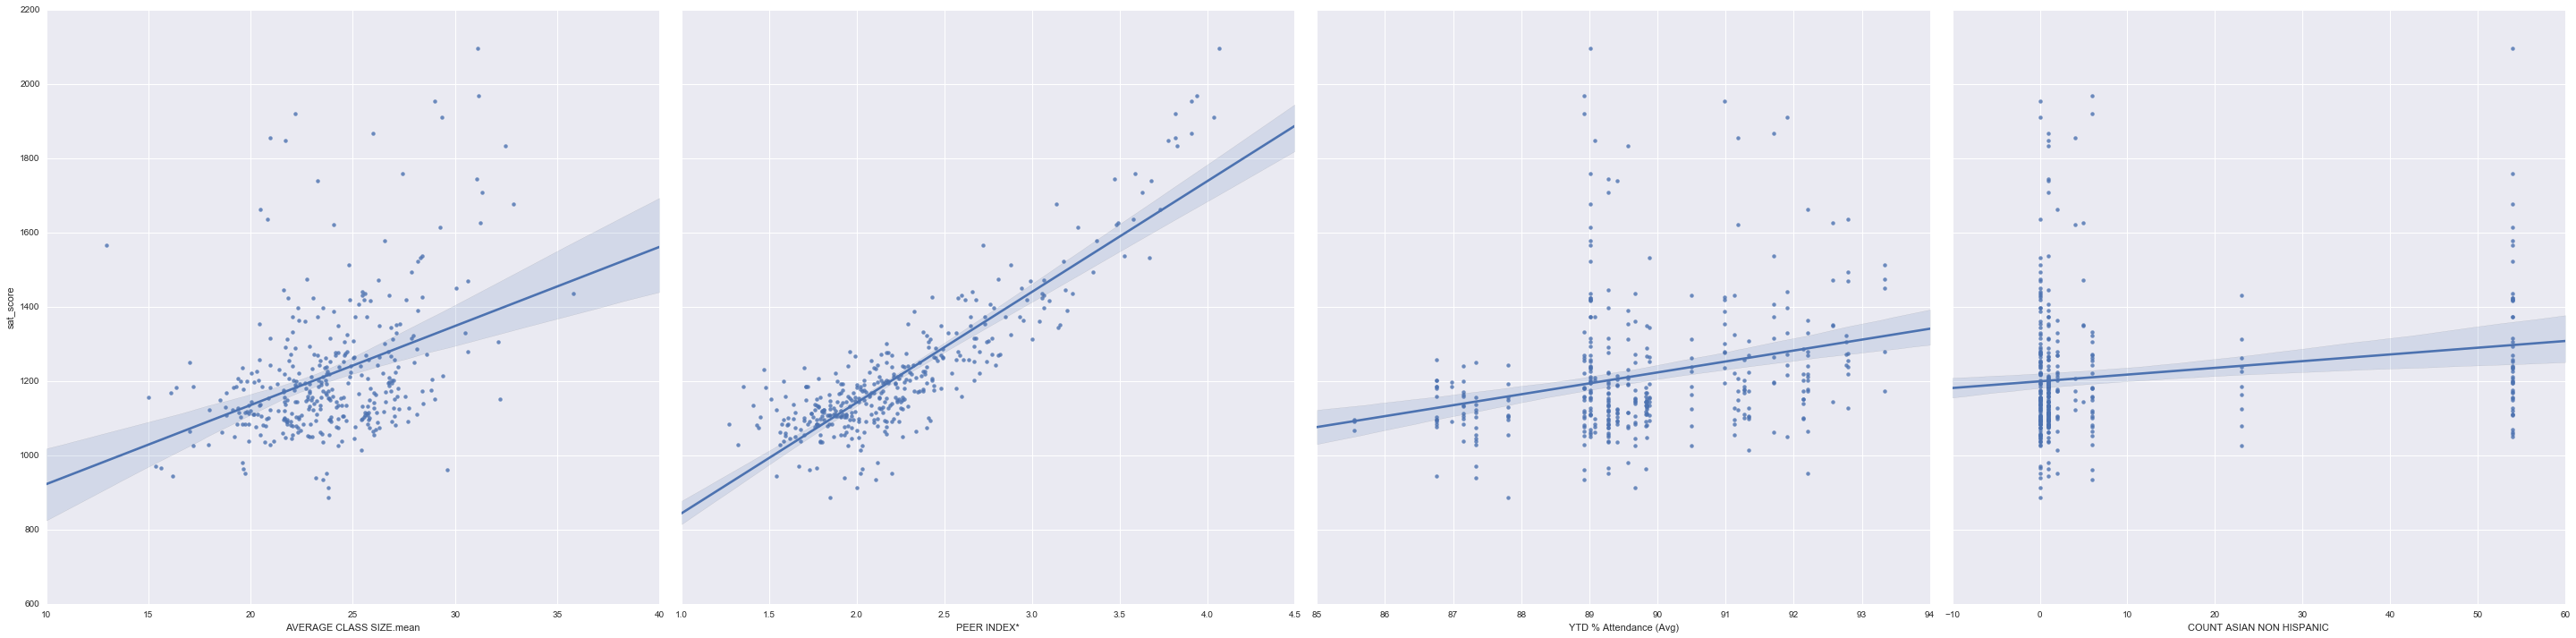

In [1567]:
sns.pairplot(final, x_vars=['AVERAGE CLASS SIZE.mean', 
                            'PEER INDEX*', 
                            'YTD % Attendance (Avg)', 
                            'COUNT ASIAN NON HISPANIC'], 
             y_vars='sat_score', 
             size=10, aspect=1.0, kind='reg')

In [1568]:
import folium
from folium import plugins

schools_map = folium.Map(location=[readFile12['lat'].mean(), readFile12['lon'].mean()], zoom_start=10)
marker_cluster = folium.MarkerCluster().add_to(schools_map)
for name, row in readFile12.iterrows():
    folium.Marker([row["lat"], row["lon"]], popup="{0}: {1}".format(row["DBN"], row["school_name"])).add_to(marker_cluster)
schools_map.create_map('schools.html')
schools_map

/Users/dev_derrick/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: Map.create_map is deprecated. Use Map.save instead


In [1569]:
schools_heatmap = folium.Map(location=[readFile12['lat'].mean(), readFile12['lon'].mean()], zoom_start=10)
schools_heatmap.add_children(plugins.HeatMap([[row["lat"], row["lon"]] for name, row in readFile12.iterrows()]))
schools_heatmap.save("heatmap.html")
schools_heatmap